**Integrantes**:
+ Matias Adolfo Gallardo Paredes

#### DICCIONARIO DE DATOS
ATRIBUTO | DESCRIPCIÓN
:--------: | -------
Fecha | Fecha de la observación 
Ubicación | Ubicación de la estación meteorológica 
MinTemp | Temperatura **mínima** en grados Celsius 
MaxTemp | Temperatura **máxima** en grados Celsius 
Lluvia | Cantidad de lluvia registrada ese día en mm. 
Evaporacion | Evaporación (mm) en 24 horas 
Sol | Horas de sol brillante en el día 
DirRafaga | Dirección de la ráfaga de viento más fuerte en 24 horas. 
VelRafaga | Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas. 
Dir9am | Dirección del viento a las 9am 
Dir3pm | Dirección del viento a las 3pm 
Vel9am | Velocidad (km/hr) del viento a las 9 am 
Vel3pm | Velocidad (km/hr) del viento a las 3 pm 
Hum9am | Porcentaje de humedad a las 9 am 
Hum3pm | Porcentaje de humedad a las 3 pm 
Pres9am | Presión atmosférica (hpa) a nivel del mar a las 9am 
Pre3pm | Presión atmosférica (hpa) a nivel del mar a las 3pm 
Nub9am | Fración del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0           indica cielo totalmente despejado y 8, cielo totalmente cubierto. 
Nub3pm | Fración del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de manera que un valor 0          indica cielo totalmente despejado y 8, cielo totalmente cubierto. 
Temp9am | Temperatura en grados celsius a las 9 am 
Temp3pm | Temperatura en grados celsius a las 3 pm 
LluviaHoy | Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs.               excede 1 mm. y 0 si no. 
LluviaMan | Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no.

1.Carga de datos
==

**Importamos las librerías necesarias para nuestro trabajo**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**En el siguiente código se crea un DataFrame de eventos llamado "data"**

In [2]:
data = pd.read_csv('DataSet.csv')
data.head()# Ver los primeros resultados

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


2.Análisis exploratorio inicial
==

a. Observaciones y características
--

**Visualización / Inspección de Datos**

In [3]:
#Mostramos las dimensiones de la DataFrame
#145460 datos por 23 columnas
data.shape

(145460, 23)

In [4]:
#La función info() se utiliza para imprimir un resumen conciso de un DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
#El tipo de dato de nuestras columnas
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
#Cantidad de datos nulos de nuestras columnas
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

b. Medidas estadísticas básicas de las columnas
--

In [7]:
#Resumen de estadísticas para columnas numéricas
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
#Resumen de estadísticas para columnas junto con las columnas de tipo object
data.describe(include = ['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2016-12-14,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [9]:
#Devuelve la media de todas las columnas
data.mean()

MinTemp            12.194034
MaxTemp            23.221348
Rainfall            2.360918
Evaporation         5.468232
Sunshine            7.611178
WindGustSpeed      40.035230
WindSpeed9am       14.043426
WindSpeed3pm       18.662657
Humidity9am        68.880831
Humidity3pm        51.539116
Pressure9am      1017.649940
Pressure3pm      1015.255889
Cloud9am            4.447461
Cloud3pm            4.509930
Temp9am            16.990631
Temp3pm            21.683390
dtype: float64

In [10]:
#Devuelve la correlación entre las columnas de un objeto DataFrame.
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [11]:
#Devuelve el número de valores no NULL en cada columna de DataFrame.
data.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [12]:
#Devuelve el valor más alto de cada columna.
data.max()

Date             2017-06-25
Location            Woomera
MinTemp                33.9
MaxTemp                48.1
Rainfall                371
Evaporation             145
Sunshine               14.5
WindGustSpeed           135
WindSpeed9am            130
WindSpeed3pm             87
Humidity9am             100
Humidity3pm             100
Pressure9am            1041
Pressure3pm          1039.6
Cloud9am                  9
Cloud3pm                  9
Temp9am                40.2
Temp3pm                46.7
dtype: object

In [13]:
#Devuelve el valor más bajo de cada columna.
data.min()

Date             2007-11-01
Location           Adelaide
MinTemp                -8.5
MaxTemp                -4.8
Rainfall                  0
Evaporation               0
Sunshine                  0
WindGustSpeed             6
WindSpeed9am              0
WindSpeed3pm              0
Humidity9am               0
Humidity3pm               0
Pressure9am           980.5
Pressure3pm           977.1
Cloud9am                  0
Cloud3pm                  0
Temp9am                -7.2
Temp3pm                -5.4
dtype: object

In [14]:
#Devuelve la mediana de cada columna.
data.median()

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.4
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
dtype: float64

In [15]:
#Devuelve la desviación estándar de cada columna.
data.std()

MinTemp           6.398495
MaxTemp           7.119049
Rainfall          8.478060
Evaporation       4.193704
Sunshine          3.785483
WindGustSpeed    13.607062
WindSpeed9am      8.915375
WindSpeed3pm      8.809800
Humidity9am      19.029164
Humidity3pm      20.795902
Pressure9am       7.106530
Pressure3pm       7.037414
Cloud9am          2.887159
Cloud3pm          2.720357
Temp9am           6.488753
Temp3pm           6.936650
dtype: float64

c.	Grafico que ayuden a comprender los datos
--

<AxesSubplot:>

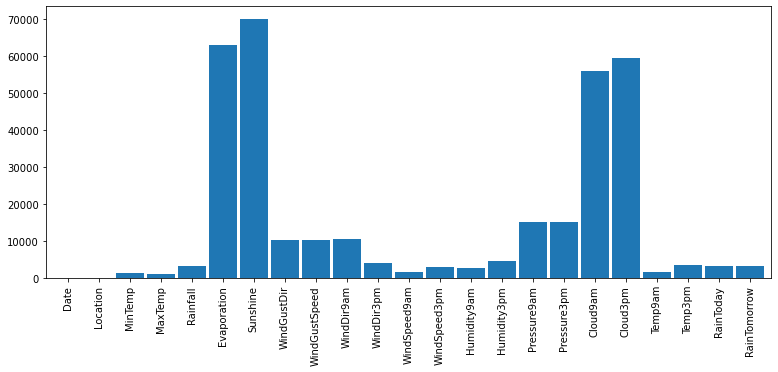

In [16]:
#Grafico de valores nulos
data.isnull().sum().plot(kind = 'bar', figsize=(13,5),width=0.9)

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

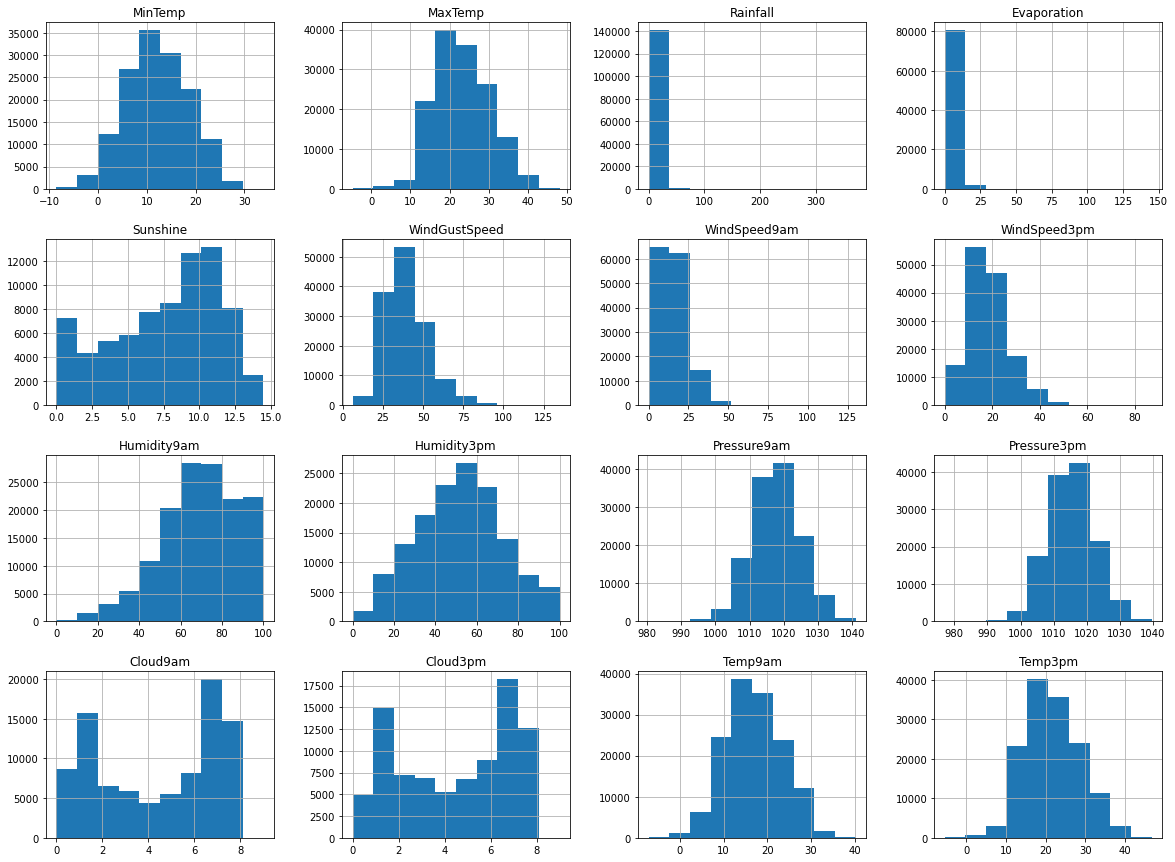

In [17]:
# muestra los gráficos de diferentes columnas
# Esto también ayuda a encontrar el número de recuentos en cada columna.
data.hist(figsize=(20,15))

Text(0, 0.5, 'RainTomorrow')

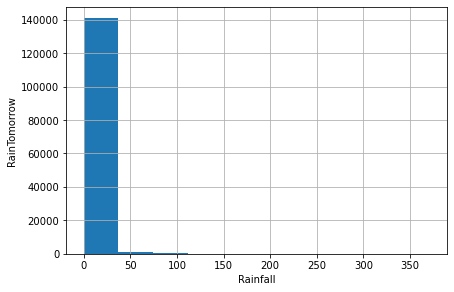

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

<AxesSubplot:>

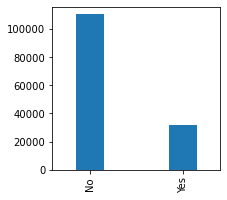

In [19]:
#grafico cantidad de veces que lluvio 
data['RainToday'].value_counts().plot(kind = 'bar', figsize=(3,3),width=0.3)

<AxesSubplot:>

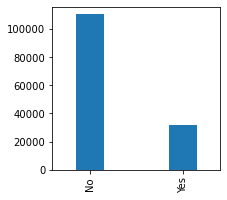

In [20]:
#grafico cantidad de veces que llueve mañana 
data['RainTomorrow'].value_counts().plot(kind = 'bar', figsize=(3,3),width=0.3)

<AxesSubplot:>

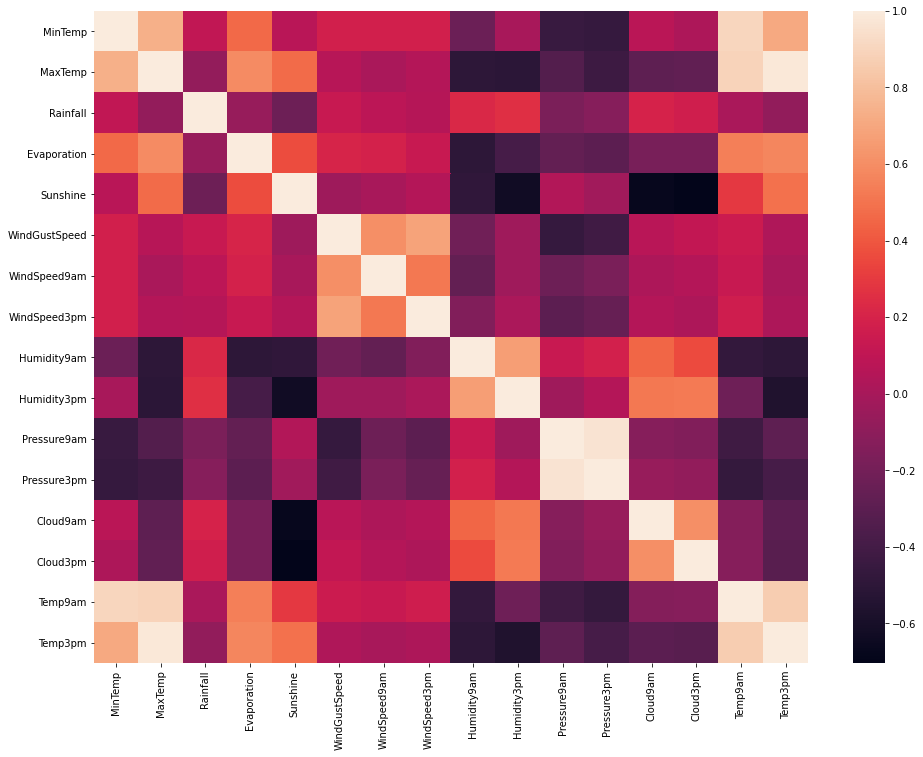

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=False)

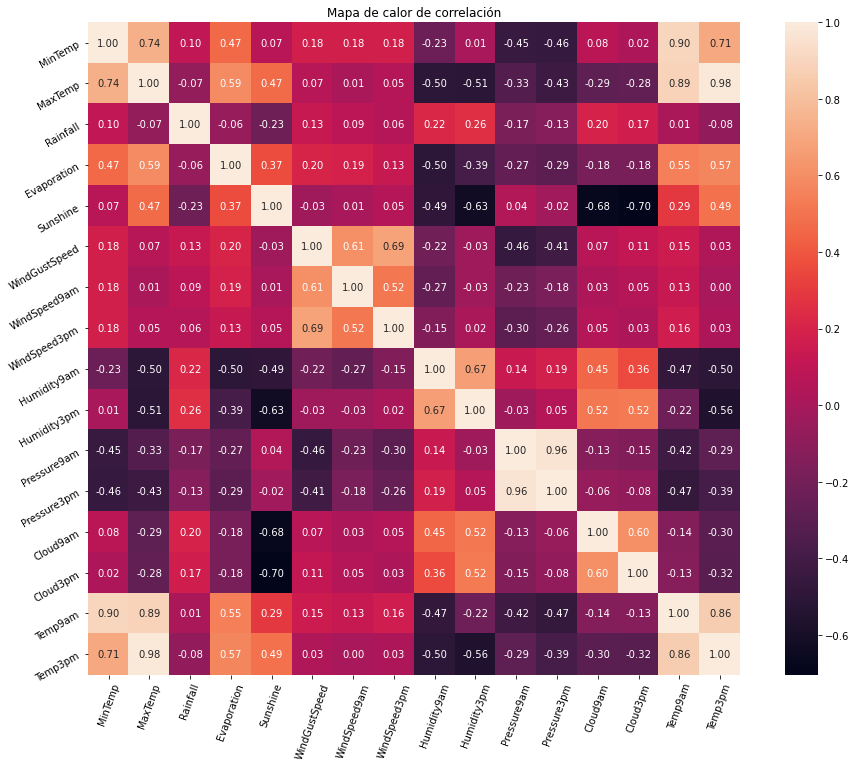

In [22]:
correlation = data.corr()
plt.figure(figsize=(16,12))
plt.title('Mapa de calor de correlación')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**MaxTemp, MinTemp, Temp9am, Temp3pm están correlacionados.**



d.	Limpieza y transformación de datos
--

In [23]:
#Renonmbrar columnas 
data = data.rename(columns = {'Date' : 'Fecha', 'Location' : 'Ubicación', 'Rainfall' : 'Lluvia',
                             'Evaporation' : 'Evaporacion','Sunshine' : 'Sol','WindGustDir' : 'DirRafaga',
                             'WindGustSpeed' : 'VelRafaga','WindDir9am' : 'Dir9am','WindDir3pm' : 'Dir3pm',
                             'WindSpeed9am' : 'Vel9am','WindSpeed3pm' : 'Vel3pm','Humidity9am' : 'Hum9am',
                             'Humidity3pm' : 'Hum3pm','Pressure9am' : 'Pres9am','Pressure3pm' : 'Pres3pm',
                             'Cloud9am' : 'Nub9am','Cloud3pm' : 'Nub3pm','Temp9am' : 'Temp9am','Temp3am' : 'Temp3pm',
                             'RainToday' : 'LluviaHoy','RainTomorrow' : 'LluviaMan'})
data.head()

,Fecha,Ubicación,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,DirRafaga,VelRafaga,Dir9am,...,Hum9am,Hum3pm,Pres9am,Pres3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [24]:
#Comprueba si hay valores nulos
#indica que no existe un valor dentro del dataset
data.isnull().sum()

Fecha              0
Ubicación          0
MinTemp         1485
MaxTemp         1261
Lluvia          3261
Evaporacion    62790
Sol            69835
DirRafaga      10326
VelRafaga      10263
Dir9am         10566
Dir3pm          4228
Vel9am          1767
Vel3pm          3062
Hum9am          2654
Hum3pm          4507
Pres9am        15065
Pres3pm        15028
Nub9am         55888
Nub3pm         59358
Temp9am         1767
Temp3pm         3609
LluviaHoy       3261
LluviaMan       3267
dtype: int64

# Imputación de valores faltantes

**¿Que es la imputación?**

Los algoritmos que intentan rellenar (o imputar) los valores que faltan se denominan algoritmos de imputación

Por diversas razones, muchos conjuntos de datos del mundo real contienen valores que faltan, a menudo codificados como espacios en blanco, NaNs u otros marcadores de posición. Sin embargo, estos conjuntos de datos son incompatibles con los estimadores scikit-learn que asumen que todos los valores de una matriz son numéricos, y que todos tienen y tienen significado. Una estrategia básica para usar conjuntos de datos incompletos es descartar filas o columnas enteras que contengan valores que faltan. Sin embargo, esto viene al precio de perder datos que pueden ser valiosos (aunque incompletos). Una mejor estrategia es imputar los valores que faltan, es decir, inferirlos a partir de la parte conocida de los datos.

#### Imputación de características multivariantes

Un enfoque más sofisticado es utilizar la clase IterativeImputer, que modela cada entidad con valores que faltan en función de otras entidades y utiliza esa estimación para la imputación. Lo hace de forma iterada por turnos: en cada paso, una columna de entidades se designa como salida y las demás columnas de entidades se tratan como entradas. Un regresor se ajusta para . A continuación, el regresor se utiliza para predecir los valores que faltan de . Esto se hace para cada entidad de forma iterativa y, a continuación, se repite para las rondas de imputación. Se devuelven los resultados de la ronda de imputación final

Vinculos referenciados a [Imputación de valores][1] . [sklearn.impute. IterativeImputer][2]

[1]: https://scikit-learn.org/stable/modules/impute.html "Imputación de valores faltantes"
[2]: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn-impute-iterativeimputer "Imputación de valores faltantes" 

In [25]:
#modela cada entidad con valores que faltan en función de otras entidades
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


#Qué estrategia utilizar para inicializar los valores que faltan
imp1= IterativeImputer(initial_strategy='mean')#Entrada del imp1 es la media
imp2= IterativeImputer(initial_strategy='median')#Entrada del imp2 es la mediana

#Ajusta el imputer en X y devuelve el X transformado
#ajusta el data y lo devuelve tranformando el mintemp con la entrada en media, a data
data[['MinTemp']]= imp1.fit_transform(data[['MinTemp']])
data[['MaxTemp']]= imp1.fit_transform(data[['MaxTemp']])
data[['Evaporacion']]= imp2.fit_transform(data[['Evaporacion']])
data[['Sol']]= imp1.fit_transform(data[['Sol']])
data[['VelRafaga']]= imp1.fit_transform(data[['VelRafaga']])
data[['Vel9am']]=imp1.fit_transform(data[['Vel9am']])
data[['Vel3pm']]=imp1.fit_transform(data[['Vel3pm']])

data[['Hum9am']]=imp1.fit_transform(data[['Hum9am']])
data[['Hum3pm']]=imp1.fit_transform(data[['Hum3pm']])

data[['Pres9am']]=imp1.fit_transform(data[['Pres9am']])
data[['Pres3pm']]=imp1.fit_transform(data[['Pres3pm']])
data[['Nub9am']]= imp2.fit_transform(data[['Nub9am']])
data[['Nub3pm']]= imp2.fit_transform(data[['Nub3pm']])
data[['Temp9am']]= imp1.fit_transform(data[['Temp9am']])
data[['Temp3pm']]= imp2.fit_transform(data[['Temp3pm']])



In [26]:
#Reemplazamos los datos nulos de Lluvia por 0
data["Lluvia"].fillna(0,inplace=True)

In [27]:
data.isnull().sum()

Fecha              0
Ubicación          0
MinTemp            0
MaxTemp            0
Lluvia             0
Evaporacion        0
Sol                0
DirRafaga      10326
VelRafaga          0
Dir9am         10566
Dir3pm          4228
Vel9am             0
Vel3pm             0
Hum9am             0
Hum3pm             0
Pres9am            0
Pres3pm            0
Nub9am             0
Nub3pm             0
Temp9am            0
Temp3pm            0
LluviaHoy       3261
LluviaMan       3267
dtype: int64

In [28]:
# Ahora podemos eliminar los valores que faltan para codificar categorías
data = data.dropna ()

In [29]:
data = data.drop(['Fecha'], axis=1)

In [30]:
data.isnull().sum()

Ubicación      0
MinTemp        0
MaxTemp        0
Lluvia         0
Evaporacion    0
Sol            0
DirRafaga      0
VelRafaga      0
Dir9am         0
Dir3pm         0
Vel9am         0
Vel3pm         0
Hum9am         0
Hum3pm         0
Pres9am        0
Pres3pm        0
Nub9am         0
Nub3pm         0
Temp9am        0
Temp3pm        0
LluviaHoy      0
LluviaMan      0
dtype: int64

Graficos con la limpieza de los datos lista 
--

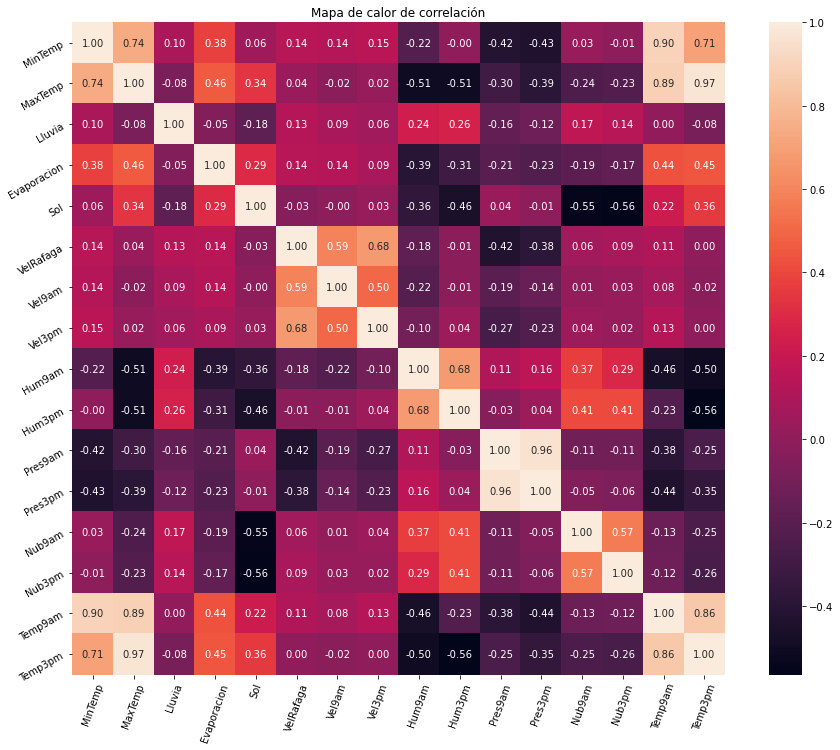

In [31]:
correlation = data.corr()
plt.figure(figsize=(16,12))
plt.title('Mapa de calor de correlación')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**Interpretación Del mapa de calor de correlación**

Positivo 1.0
Negativo -0.1

+ Las variables MinTemp y MaxTemp están altamente correlacionadas positivamente 0,74.
+ Las variables MinTemp y Temp3pm también tienen una correlación muy positivamente 0,71.
+ Las variables MinTemp y Temp9am están fuertemente correlacionadas positivamente 0,90.
+ Las variables MaxTemp y Temp9am están fuertemente correlacionadas positivamente 0,89.
+ Las variables MaxTemp y Temp3pm también están fuertemente correlacionadas positivamente 0,97.
+ Las variables VelRafaga y Vel3pm tienen una correlación muy positiva 0,68.
+ Las variables Pres9am y Pres3pm están fuertemente correlacionadas positivamente 0,96.
+ Las variables Temp9am y Temp3pm están fuertemente correlacionadas positivamente 0,86.

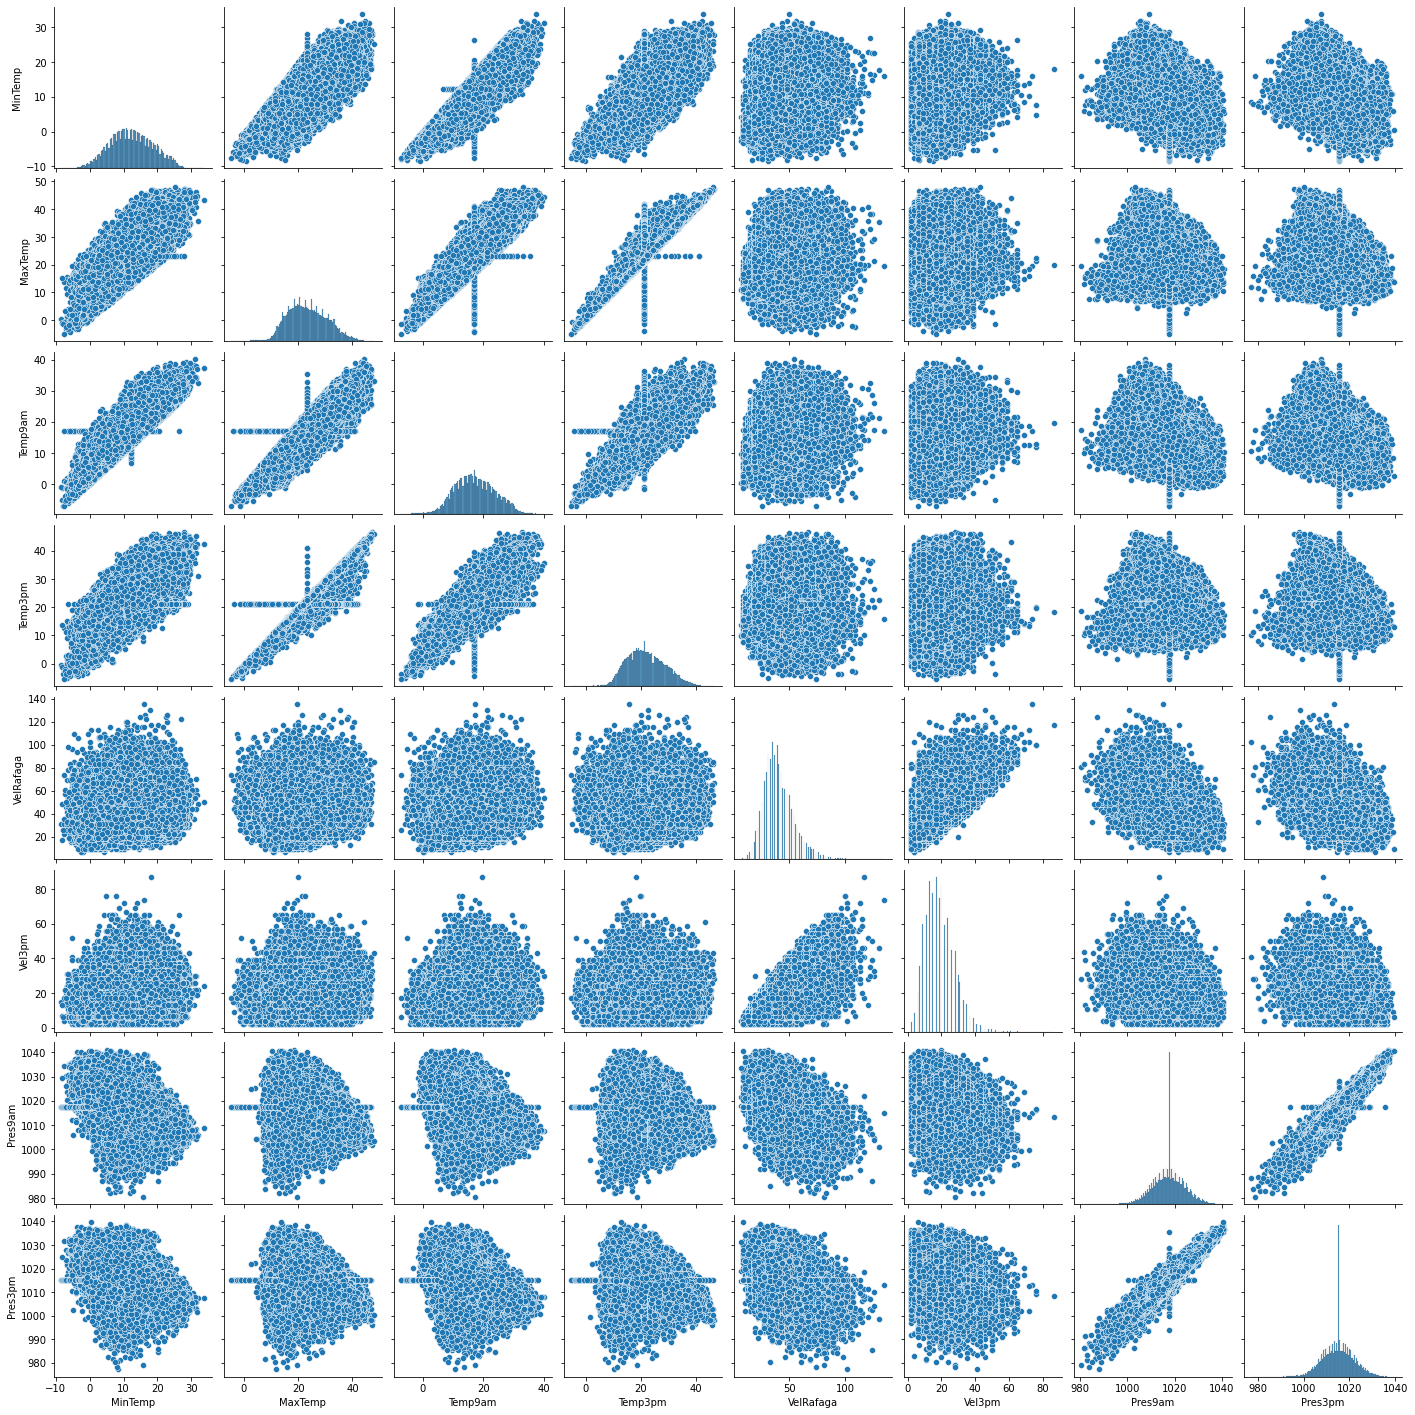

In [32]:
variables = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'VelRafaga', 'Vel3pm', 'Pres9am', 'Pres3pm']
sns.pairplot(data[variables], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

Trazar relaciones en pares en un dataset.

De forma predeterminada, esta función creará una cuadrícula de ejes de modo que cada variable numérica de la lista se compartirá entre los ejes y de una sola fila y los ejes x en una sola columna

**relación entre estas variables**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LluviaMan', ylabel='count'>

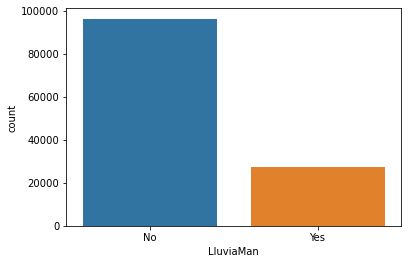

In [33]:
sns.countplot(data['LluviaMan'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LluviaHoy', ylabel='count'>

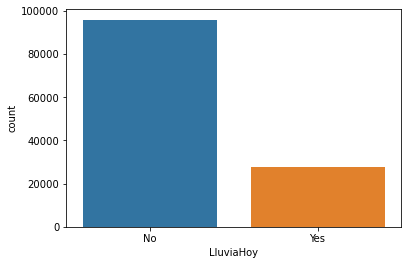

In [34]:
sns.countplot(data['LluviaHoy'])

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Lluvia'}>,
        <AxesSubplot:title={'center':'Evaporacion'}>],
       [<AxesSubplot:title={'center':'Sol'}>,
        <AxesSubplot:title={'center':'VelRafaga'}>,
        <AxesSubplot:title={'center':'Vel9am'}>,
        <AxesSubplot:title={'center':'Vel3pm'}>],
       [<AxesSubplot:title={'center':'Hum9am'}>,
        <AxesSubplot:title={'center':'Hum3pm'}>,
        <AxesSubplot:title={'center':'Pres9am'}>,
        <AxesSubplot:title={'center':'Pres3pm'}>],
       [<AxesSubplot:title={'center':'Nub9am'}>,
        <AxesSubplot:title={'center':'Nub3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

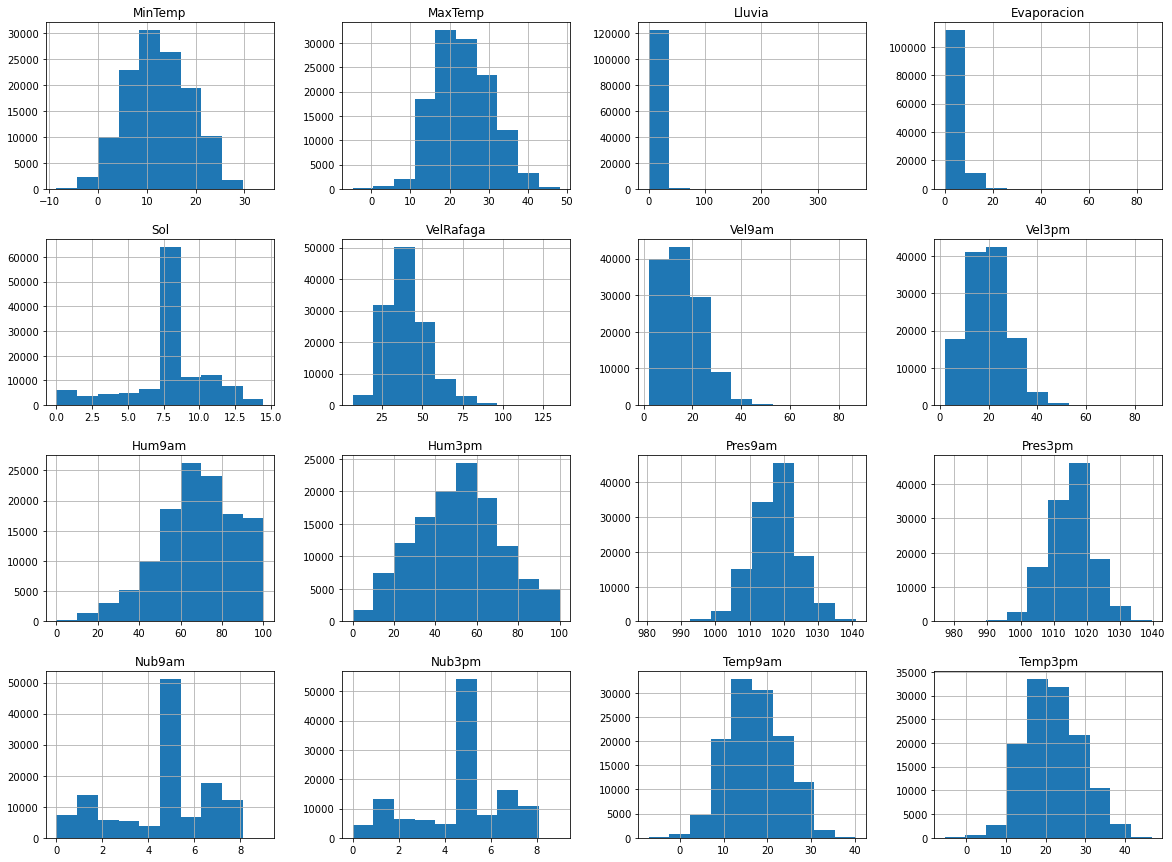

In [35]:
# muestra los gráficos de diferentes columnas
# Esto también ayuda a encontrar el número de recuentos en cada columna.
data.hist(figsize=(20,15))

In [36]:
data[(data['LluviaHoy'] == 'Yes') & (data['Hum9am'] > 20)]

,Ubicación,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,DirRafaga,VelRafaga,Dir9am,Dir3pm,...,Hum9am,Hum3pm,Pres9am,Pres3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan
9,Albury,13.1,30.1,1.4,4.8,7.611178,W,28.0,S,SSE,...,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,Yes,No
11,Albury,15.9,21.7,2.2,4.8,7.611178,NNE,31.0,NE,ENE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,Albury,15.9,18.6,15.6,4.8,7.611178,W,61.0,NNW,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
13,Albury,12.6,21.0,3.6,4.8,7.611178,SW,44.0,W,SSW,...,65.0,43.0,1001.2,1001.8,5.0,7.0,15.8,19.8,Yes,No
17,Albury,13.5,22.9,16.8,4.8,7.611178,W,63.0,N,WNW,...,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145325,Uluru,22.2,39.4,6.2,4.8,7.611178,S,30.0,S,W,...,56.0,25.0,1008.4,1004.9,5.0,4.0,28.6,38.7,Yes,No
145391,Uluru,15.2,21.5,6.8,4.8,7.611178,ENE,30.0,NE,ENE,...,65.0,65.0,1016.9,1015.3,3.0,8.0,19.0,21.2,Yes,Yes
145392,Uluru,17.7,26.9,12.6,4.8,7.611178,S,35.0,E,SSW,...,93.0,59.0,1018.1,1014.7,7.0,8.0,19.0,26.0,Yes,Yes
145393,Uluru,18.6,28.6,34.6,4.8,7.611178,E,46.0,E,E,...,100.0,56.0,1020.0,1015.8,8.0,5.0,19.8,26.9,Yes,Yes


4.Codificación de los datos
==

**Codificación de columna con datos fijos**

In [37]:
#codificacion de los datos de la columna DirRafaga 
data["DirRafaga"] = data["DirRafaga"].map({"SE":0, "W":1, "E":2, "N":3, "SSE":4, "S":5, 
                                           "SW":6, "NW":7, "WSW":8, "SSW":9, "WNW":10, "ENE":11, 
                                           "NE":12, "ESE":13, "NNW":14, "NNE":15})

In [38]:
#codificacion de los datos de la columna Dir9am
data["Dir9am"] = data["Dir9am"].map({"SE":0, "W":1, "E":2, "N":3, "SSE":4, "S":5, "SW":6, "NW":7, 
                                     "WSW":8, "SSW":9, "WNW":10, "ENE":11, "NE":12, "ESE":13, 
                                     "NNW":14, "NNE":15})

In [39]:
#codificacion de los datos de la columna Dir9am
data["Dir3pm"] = data["Dir3pm"].map({"SE":0, "W":1, "E":2, "N":3, "SSE":4, "S":5, "SW":6, "NW":7, 
                                     "WSW":8, "SSW":9, "WNW":10, "ENE":11, "NE":12, "ESE":13, 
                                    "NNW":14, "NNE":15})

In [40]:
#codificacion de los datos de la columna lluviaMan
data["LluviaMan"] = data["LluviaMan"].map({"No":0, "N":0, "Yes":1, "YES":1})

In [41]:
#codificacion de los datos de la columna lluviaHoy
data["LluviaHoy"] = data["LluviaHoy"].map({"No":0, "N":0, "Yes":1, "YES":1})

In [42]:
#codificacion de los datos de la columna lluvia 
data["Ubicación"] = data["Ubicación"].map({"Adelaide":1, "Albany":2, "Albury":3, "AliceSprings":4, 
                                           "BadgerysCreek":5, "Ballarat":6, "Bendigo":7,  "Brisbane":8, "Cairns":9, "Canberra":10,
                                           "Cobar":11, "CoffsHarbour":12, "Dartmoor":13,  "Darwin":14, "GoldCoast":15, "Hobart":16, 
                                          "Katherine":17, "Launceston":18, "Melbourne":19,  "MelbourneAirport":20, "Mildura":21, "Moree":22,
                                           "MountGambier":23, "MountGinini":24, "Newcastle":25,  "Nhil":26, "NorahHead":27, "NorfolkIsland":28,
                                          "Nuriootpa":29, "PearceRAAF":30, "Penrith":31,  "Perth":32, "PerthAirport":33, "Portland":34,
                                           "Richmond":35, "Sale":36, "SalmonGums":37,  "Sydney":38, "SydneyAirport":39, "Townsville":40,
                                          "Tuggeranong":41, "Uluru":42, "WaggaWagga":43,  "Walpole":44, "Watsonia":45, "Williamtown":46,
                                           "Witchcliffe":47, "Wollongong":48, "Woomera":49})

**codificar columna excluyente**

La función get_dummies permite eliminar la primera de las columnas generadas para cada característica codificada

In [43]:
#Codificamos la variable DirRafaga 
#data = pd.get_dummies(data, columns = ["DirRafaga"])

In [44]:
#Codificamos la variable Dir9am DirRafaga Dir3pm
#data = pd.get_dummies(data, columns = ["Dir9am"])

In [45]:
#Codificamos la variable Dir3pm 
#data = pd.get_dummies(data, columns = ["Dir3pm"])

In [46]:
#drop_first borramos la primera columna a que son excluyentes
#Codificamos la variable LluviaMan 
#data = pd.get_dummies(data, columns = ["LluviaMan"], drop_first = True)

In [47]:
#drop_first borramos la primera columna a que son excluyentes
#Codificamos la variable LluviaHoy 
#data = pd.get_dummies(data, columns = ["LluviaHoy"], drop_first = True)

In [48]:
#Codificamos la variable Ubicación 
#data = pd.get_dummies(data, columns = ["Ubicación"])

In [49]:
data

,Ubicación,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,DirRafaga,VelRafaga,Dir9am,Dir3pm,...,Hum9am,Hum3pm,Pres9am,Pres3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan
0,3,13.4,22.9,0.6,4.8,7.611178,1,44.0,1,10,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,3,7.4,25.1,0.0,4.8,7.611178,10,44.0,14,8,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,3,12.9,25.7,0.0,4.8,7.611178,8,46.0,1,8,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,3,9.2,28.0,0.0,4.8,7.611178,12,24.0,0,2,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,3,17.5,32.3,1.0,4.8,7.611178,1,41.0,11,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,42,3.5,21.8,0.0,4.8,7.611178,2,31.0,13,2,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
145455,42,2.8,23.4,0.0,4.8,7.611178,2,31.0,0,11,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,42,3.6,25.3,0.0,4.8,7.611178,14,22.0,0,3,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,42,5.4,26.9,0.0,4.8,7.611178,3,37.0,0,10,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


5.Escalado de características
==


**datos en conjuntos un de prueba y entrenamiento separados**

In [50]:
# Se dividen en X e y en un conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Variables
X = data.drop(['LluviaMan','Ubicación'], axis=1) # Se selecciona LLuviaMan porque es nuestro objetivo en nuestro análisis
y = data['LluviaMan']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [51]:
#Comprobamos nuestros datos 
X_train.shape, X_test.shape

((98968, 20), (24742, 20))

In [52]:
X_train

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,DirRafaga,VelRafaga,Dir9am,Dir3pm,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pres3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy
63134,-2.2,13.4,0.0,4.8,7.611178,1,30.0,7,8,11.0,20.0,84.0,46.0,1034.4,1030.6,0.0,0.0,3.3,13.3,0
139645,24.8,32.4,1.6,5.2,5.600000,3,52.0,12,3,13.0,17.0,85.0,60.0,1011.4,1008.6,7.0,7.0,27.2,31.8,1
29741,17.2,22.6,0.0,4.8,7.611178,0,39.0,5,0,13.0,20.0,76.0,74.0,1022.5,1020.4,8.0,8.0,19.8,19.7,0
104078,5.4,15.4,0.2,2.0,4.200000,6,20.0,6,8,9.0,15.0,85.0,80.0,1029.6,1028.1,7.0,7.0,11.1,13.7,0
975,2.8,20.4,0.0,4.8,7.611178,13,17.0,0,2,7.0,7.0,65.0,31.0,1028.4,1025.3,5.0,5.0,10.4,19.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31670,18.6,25.7,0.0,6.0,10.800000,11,31.0,12,12,11.0,17.0,60.0,62.0,1017.8,1016.3,5.0,5.0,24.6,24.5,0
134675,8.6,15.9,9.6,4.8,7.611178,14,46.0,14,14,17.0,28.0,95.0,92.0,1001.6,1002.9,5.0,5.0,12.9,13.3,1
112115,6.0,23.0,0.0,4.8,7.611178,15,19.0,0,14,11.0,7.0,99.0,48.0,1017.1,1014.0,5.0,5.0,11.2,22.8,0
97881,12.3,20.2,3.8,5.2,7.611178,8,39.0,8,8,17.0,20.0,66.0,37.0,1016.5,1016.5,5.0,5.0,15.6,19.7,1


a.	Normalización de datos
--

In [53]:
#X_train_norm y X_test_norm Son los datos normalizados
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)


In [54]:
pd.DataFrame(X_train_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.148585,0.340467,0.000000,0.055684,0.524909,0.066667,0.179688,0.466667,0.533333,0.105882,0.211765,0.84,0.46,0.898333,0.8560,0.000000,0.000000,0.218220,0.346380,0.0
1,0.785377,0.710117,0.004353,0.060325,0.386207,0.200000,0.351562,0.800000,0.200000,0.129412,0.176471,0.85,0.60,0.515000,0.5040,0.777778,0.777778,0.724576,0.708415,1.0
2,0.606132,0.519455,0.000000,0.055684,0.524909,0.000000,0.250000,0.333333,0.000000,0.129412,0.211765,0.76,0.74,0.700000,0.6928,0.888889,0.888889,0.567797,0.471624,0.0
3,0.327830,0.379377,0.000544,0.023202,0.289655,0.400000,0.101562,0.400000,0.533333,0.082353,0.152941,0.85,0.80,0.818333,0.8160,0.777778,0.777778,0.383475,0.354207,0.0
4,0.266509,0.476654,0.000000,0.055684,0.524909,0.866667,0.078125,0.000000,0.133333,0.058824,0.058824,0.65,0.31,0.798333,0.7712,0.555556,0.555556,0.368644,0.469667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98963,0.639151,0.579767,0.000000,0.069606,0.744828,0.733333,0.187500,0.800000,0.800000,0.105882,0.176471,0.60,0.62,0.621667,0.6272,0.555556,0.555556,0.669492,0.565558,0.0
98964,0.403302,0.389105,0.026115,0.055684,0.524909,0.933333,0.304688,0.933333,0.933333,0.176471,0.305882,0.95,0.92,0.351667,0.4128,0.555556,0.555556,0.421610,0.346380,1.0
98965,0.341981,0.527237,0.000000,0.055684,0.524909,1.000000,0.093750,0.000000,0.933333,0.105882,0.058824,0.99,0.48,0.610000,0.5904,0.555556,0.555556,0.385593,0.532290,0.0
98966,0.490566,0.472763,0.010337,0.060325,0.524909,0.533333,0.250000,0.533333,0.533333,0.176471,0.211765,0.66,0.37,0.600000,0.6304,0.555556,0.555556,0.478814,0.471624,1.0


In [55]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

b.	Estandarización de datos
--

In [56]:
#X_train_stand y X_test_stand son los datos estandarizados
from sklearn.preprocessing import StandardScaler
stand = StandardScaler().fit(X_train_stand[["Evaporacion"]])

X_train_stand[["Evaporacion"]] = stand.transform(X_train_stand[["Evaporacion"]])
X_test_stand[["Evaporacion"]] = stand.transform(X_test_stand[["Evaporacion"]])

In [57]:
stand = StandardScaler().fit(X_train_stand[["MinTemp"]])
X_train_stand[["MinTemp"]] = stand.transform(X_train_stand[["MinTemp"]])
X_test_stand[["MinTemp"]] = stand.transform(X_test_stand[["MinTemp"]])

In [58]:
stand = StandardScaler().fit(X_train_stand[["Lluvia"]])
X_train_stand[["Lluvia"]] = stand.transform(X_train_stand[["Lluvia"]])
X_test_stand[["Lluvia"]] = stand.transform(X_test_stand[["Lluvia"]])

In [59]:
stand = StandardScaler().fit(X_train_stand[["Sol"]])
X_train_stand[["Sol"]] = stand.transform(X_train_stand[["Sol"]])
X_test_stand[["Sol"]] = stand.transform(X_test_stand[["Sol"]])

In [60]:
pd.DataFrame(X_train_stand)

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,DirRafaga,VelRafaga,Dir9am,Dir3pm,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pres3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy
63134,-2.295218,13.4,-0.278881,-0.146369,-0.020907,1,30.0,7,8,11.0,20.0,84.0,46.0,1034.4,1030.6,0.0,0.0,3.3,13.3,0
139645,1.943492,32.4,-0.091547,-0.025205,-0.742581,3,52.0,12,3,13.0,17.0,85.0,60.0,1011.4,1008.6,7.0,7.0,27.2,31.8,1
29741,0.750374,22.6,-0.278881,-0.146369,-0.020907,0,39.0,5,0,13.0,20.0,76.0,74.0,1022.5,1020.4,8.0,8.0,19.8,19.7,0
104078,-1.102099,15.4,-0.255464,-0.994519,-1.244945,6,20.0,6,8,9.0,15.0,85.0,80.0,1029.6,1028.1,7.0,7.0,11.1,13.7,0
975,-1.510271,20.4,-0.278881,-0.146369,-0.020907,13,17.0,0,2,7.0,7.0,65.0,31.0,1028.4,1025.3,5.0,5.0,10.4,19.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31670,0.970159,25.7,-0.278881,0.217123,1.123343,11,31.0,12,12,11.0,17.0,60.0,62.0,1017.8,1016.3,5.0,5.0,24.6,24.5,0
134675,-0.599734,15.9,0.845121,-0.146369,-0.020907,14,46.0,14,14,17.0,28.0,95.0,92.0,1001.6,1002.9,5.0,5.0,12.9,13.3,1
112115,-1.007906,23.0,-0.278881,-0.146369,-0.020907,15,19.0,0,14,11.0,7.0,99.0,48.0,1017.1,1014.0,5.0,5.0,11.2,22.8,0
97881,-0.018873,20.2,0.166037,-0.025205,-0.020907,8,39.0,8,8,17.0,20.0,66.0,37.0,1016.5,1016.5,5.0,5.0,15.6,19.7,1


6.Aplicación de modelos estadísticos
==


Modelo KNN
--

In [61]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)

#### Datos Brutos u originales

In [62]:
#X_train y X_test son los datos normales
from sklearn.metrics import mean_squared_error
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

knnB = np.sqrt(mean_squared_error(y_test,pred))

knnB

0.34159911390014686

#### Datos normalizados

In [63]:
knn.fit(X_train_norm,y_train)
pred = knn.predict(X_test_norm)

KnnNorm = np.sqrt(mean_squared_error(y_test,pred))
KnnNorm

0.34658279621091287

#### Datos estandarizados

In [64]:
knn.fit(X_train_stand,y_train)
pred = knn.predict(X_test_stand)

knnEstand = np.sqrt(mean_squared_error(y_test,pred))
knnEstand

0.3443791254991376

*****************************************************

Arbol de deciciones
--

In [65]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1,random_state=12)

#### Datos originales

In [66]:
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

DToriginal = np.sqrt(mean_squared_error(y_test,pred))
DToriginal

0.37397310552123086

#### Datos Normalizados

In [67]:
dt.fit(X_train_norm,y_train)
pred = dt.predict(X_test_norm)

DTnorm = np.sqrt(mean_squared_error(y_test,pred))
DTnorm

0.37397310552123086

#### Datos Estandarizados

In [68]:
dt.fit(X_train_stand,y_train)
pred = dt.predict(X_test_stand)

DTestand = np.sqrt(mean_squared_error(y_test,pred))
DTestand

0.37397310552123086

****************************************************************************************************

Clasificador de bosque aleatorio
--

Clasificador de bosque aleatorio.

Un bosque aleatorio es un meta estimador que se ajusta a varios clasificadores de árboles de decisión en varias sub-muestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

+ X_train_norm y X_test_norm Son los datos normalizados
+ X_train_stand y X_test_stand son los datos estandarizados
+ X_train y X_test son los datos normales

#### Datos originales

In [69]:
#probabilidades 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix,roc_auc_score, roc_curve
model = RandomForestClassifier()

model.fit(X_train,y_train)
preds=model.predict_proba(X_test)[:,1]

RFori = roc_auc_score(y_test,preds)
RFori

0.8861886156986832

#### Datos Normalizados

In [70]:
# X_train_norm y X_test_norm Son los datos normalizados
model.fit(X_train_norm,y_train)
preds=model.predict_proba(X_test_norm)[:,1]

RFnorm = roc_auc_score(y_test,preds)
RFnorm

0.8863529710483179

#### Datos Estandarizados

In [71]:
# X_train_stand y X_test_stand son los datos estandarizados
model.fit(X_train_stand,y_train)
preds=model.predict_proba(X_test_stand)[:,1]

RFestand = roc_auc_score(y_test,preds)

RFestand


0.8863038088412737

7.Comparación de los resultados
==

**a.	Justificar la selección del DataSet (original, normalizado o estandarizado)**



In [72]:
print(f'Modelo KNN Datos brutos:{knnB}')
print(f'Modelo KNN Normalizado: {KnnNorm}')
print(f'Modelo KNN Estandarizado: {knnEstand}')

Modelo KNN Datos brutos:0.34159911390014686
Modelo KNN Normalizado: 0.34658279621091287
Modelo KNN Estandarizado: 0.3443791254991376


In [73]:
print(f'Modelo Arbol de deciciones Datos brutos:{DToriginal}')
print(f'Modelo Arbol de deciciones Normalizado: {DTnorm}')
print(f'Modelo Arbol de deciciones estandarizado: {DTestand}')

Modelo Arbol de deciciones Datos brutos:0.37397310552123086
Modelo Arbol de deciciones Normalizado: 0.37397310552123086
Modelo Arbol de deciciones estandarizado: 0.37397310552123086


In [74]:
print(f'Modelo bosque aleatorio Datos brutos:{RFori}')
print(f'Modelo bosque aleatorio Normalizado: {RFnorm}')
print(f'Modelo bosque aleatorio estandarizado: {RFestand}')

Modelo bosque aleatorio Datos brutos:0.8861886156986832
Modelo bosque aleatorio Normalizado: 0.8863529710483179
Modelo bosque aleatorio estandarizado: 0.8863038088412737


En este caso el mejor dataset que podemos utilizar es el Original ya que no tenemos una gran disparidad de datos

**b.	Justificar la selección del mejor modelo predictivo**


El mejor modelo predictivo que utilizaremos es Clasificador de bosque aleatorio, ya que 
Puede predecir la lluvia en Australia sobre un 88% de precisión

**Presentación de los modelos en gráficos**
==

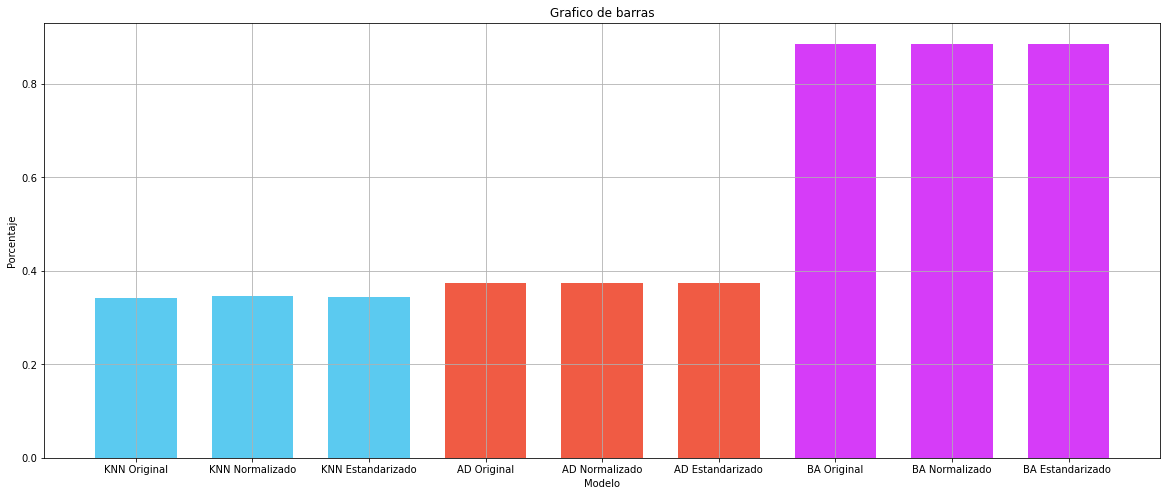

In [75]:
Modelo = ["KNN Original","KNN Normalizado", "KNN Estandarizado",
         "AD Original", "AD Normalizado", "AD Estandarizado",
         "BA Original", "BA Normalizado", "BA Estandarizado "]
Valores = [knnB,KnnNorm,knnEstand,DToriginal,DTnorm,DTestand,RFori,RFnorm,RFestand]
Colores = ["#5BCAF0","#5BCAF0","#5BCAF0","#F05B44","#F05B44","#F05B44","#D63CF8","#D63CF8","#D63CF8"]

f, ax = plt.subplots(figsize=(20,8))
plt.bar(Modelo,Valores, color=Colores,label="Modelos", width=0.7)

plt.title('Grafico de barras')

plt.xlabel('Modelo')
plt.ylabel('Porcentaje')
plt.grid()
plt.show()